## Perceptron

In [ ]:
X = [
    {'a': 5,'b': 3, 'f': 0},
    {'a': 10, 'b': 15, 'f': 0},
    {'a': 15, 'b': 12, 'f': 0},
    {'a': 24, 'b': 10, 'f': 0},
    {'a': 30, 'b': 30, 'f': 0},
    {'a': 85, 'b': 70, 'f': 1},
    {'a': 71, 'b': 80, 'f': 1},
    {'a': 60, 'b': 78, 'f': 1},
    {'a': 70, 'b': 55, 'f': 1},
    {'a': 80, 'b': 91, 'f': 1}
]

In [ ]:
def createPerceptron(b=0, weights):
    def perceptron(*inputs):
        total = b + sum(map(lambda t: t[0] * t[1], zip(inputs, weights)))
        return total > 0
    return perceptron

def createPerceptronEvolutor(currentB=0, currentWeights, expectedOutput, inputs):
    currentPerceptron = createPerceptron(b, *w)
    currentPerceptronOuput = 
    total = b + sum(map(lambda t: t[0] * t[1], zip(inputs, currentWeights)))
    error = expectedOutput - total
    return [(wi - r * error * xi) for wi, xi in zip(currentWeights, inputs)]

https://github.com/StackAbuse/Introduction-to-GANs-with-Python-and-TensorFlow

https://stackabuse.com/introduction-to-gans-with-python-and-tensorflow/

In [4]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [5]:
# Sample z from uniform distribution
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [6]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [10]:
# Declare inputs and parameters to the model

# Input image, foe discrminator model.
# X = tf.placeholder(tf.float32, shape=[None, 784])
X = tf.compat.v1.placeholder(tf.float32, shape=[784, 784])

# Input noise for generator.
#Z = tf.placeholder(tf.float32, shape=[None, 100])

RuntimeError: tf.placeholder() is not compatible with eager execution.

In [11]:
def generator(z):
    
    with tf.variable_scope("generator", reuse=tf.AUTO_REUSE):
        
        x = tf.layers.dense(z, 128, activation = tf.nn.relu)
        x = tf.layers.dense(z, 784)
        x = tf.nn.sigmoid(x)

    return x


def discriminator(x):
    with tf.variable_scope("discrminator", reuse=tf.AUTO_REUSE):
        x = tf.layers.dense(x, 128, activation = tf.nn.relu)
        x = tf.layers.dense(x, 1)
        x = tf.nn.sigmoid(x)

    return x

In [12]:
G_sample = generator(Z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

# Optimizers
disc_vars = [var for var in tf.trainable_variables() if var.name.startswith("disc")]
gen_vars =  [var for var in tf.trainable_variables() if var.name.startswith("gen")]

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=disc_vars)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_vars)

NameError: name 'Z' is not defined

In [ ]:
# Batch size
mb_size = 128

# Dimention of input noise
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out2/'):
    os.makedirs('out2/')

i = 0

for it in range(1000000):
    
    # Save generated images every 1000 iterations.
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        plt.savefig('out2/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)
        
        
    # Get next batch of images. Each batch has mb_size samples.
    X_mb, _ = mnist.train.next_batch(mb_size)
    
    
    # Run disciminator solver
    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    
    # Run generator solver
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    # Print loss
    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))

https://www.tensorflow.org/tutorials/generative/dcgan

In [13]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [14]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [15]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 1s 0us/step


In [18]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]


In [19]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


2022-05-11 17:00:30.329267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-11 17:00:30.329355: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-11 17:00:30.329390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a15c8d2a57f3): /proc/driver/nvidia/version does not exist
2022-05-11 17:00:30.334249: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

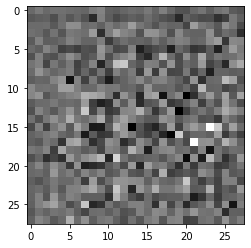

In [21]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')


In [22]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [23]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)


tf.Tensor([[-0.00149186]], shape=(1, 1), dtype=float32)


In [24]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [25]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [26]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [27]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [28]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [29]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [30]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [31]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


In [32]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


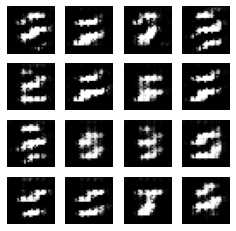

Time for epoch 4 is 1142.214025259018 sec


KeyboardInterrupt: 

In [33]:
train(train_dataset, EPOCHS)